In [1]:
import pandas as pd
import numpy as n

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
data = pd.read_csv(r"resources/data.csv")
riasec = pd.read_csv(r"resources/riasec/riasec.csv")
ocean = pd.read_csv(r"resources/ocean/ocean.csv")

In [3]:
gender = data[['gender']]

riasec_perc = pd.read_csv(r"resources/riasec/riasec_perc.csv",index_col=0)
ocean_perc = pd.read_csv(r"resources/ocean/ocean_perc.csv",index_col=0)

In [4]:
print(ocean_perc)

          Openness  Conscientiousness  Extraversion  Agreeableness  \
0        35.714286          28.571429     42.857143      64.285714   
1       100.000000          78.571429     50.000000      64.285714   
2        71.428571          71.428571     92.857143      78.571429   
3        50.000000          92.857143     42.857143      85.714286   
4        35.714286          28.571429     50.000000      57.142857   
...            ...                ...           ...            ...   
145823   78.571429          42.857143     35.714286      85.714286   
145824  100.000000         100.000000     64.285714      92.857143   
145825   78.571429         100.000000     71.428571      64.285714   
145826   71.428571          57.142857     64.285714      71.428571   
145827  100.000000          64.285714     42.857143      50.000000   

        Neuroticism  
0         78.571429  
1         71.428571  
2         42.857143  
3         28.571429  
4         35.714286  
...             ...  
14582

<BarContainer object of 6 artists>

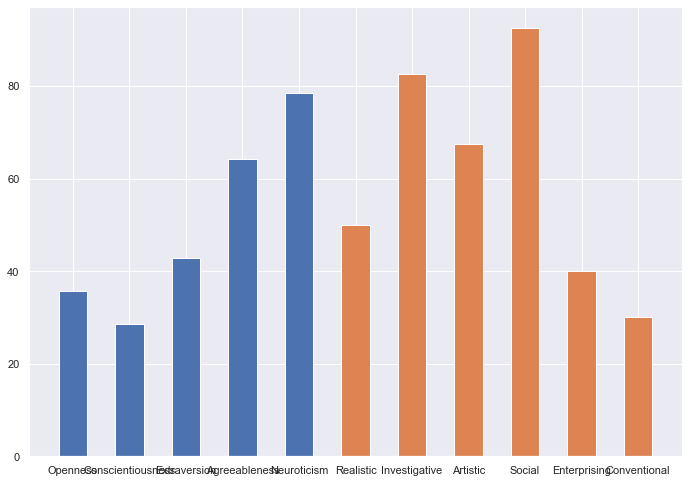

In [5]:
sns.color_palette("hls", 10)
plt.bar(ocean_perc.columns, ocean_perc.loc[0],width = 0.5)
plt.bar(riasec_perc.columns,riasec_perc.loc[0],width = 0.5)

In [6]:
oceanx = ocean_perc.product(axis=1)
riasecy = riasec_perc.product(axis=1)
print(oceanx,riasecy)

0         2.208901e+08
1         1.803936e+09
2         1.595317e+09
3         4.872970e+08
4         1.041233e+08
              ...     
145823    5.890403e+08
145824    5.969388e+09
145825    2.577051e+09
145826    1.070982e+09
145827    1.180758e+09
Length: 145828, dtype: float64 0         3.090656e+10
1         5.000488e+09
2         3.062812e+09
3         1.972595e+10
4         7.474289e+10
              ...     
145823    9.455469e+09
145824    2.533781e+10
145825    1.134000e+09
145826    6.154412e+10
145827    6.249182e+10
Length: 145828, dtype: float64


In [7]:
import plotly.express as px
ocean_rad = pd.DataFrame(dict(
    r=ocean_perc.loc[0],
    theta=ocean_perc.columns))
fig = px.line_polar(ocean_rad, r='r', theta='theta', line_close=True,range_r=(0,100))
fig.show()

riasec_rad = pd.DataFrame(dict(
    r=riasec_perc.loc[0],
    theta=riasec_perc.columns))
fig = px.line_polar(riasec_rad, r='r', theta='theta', line_close=True,range_r=(0,100))
fig.show()


In [15]:
from sklearn import linear_model

X = ocean_perc[['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']]
y = riasec_perc[['Realistic','Investigative','Artistic','Social','Enterprising','Conventional']]

regr = linear_model.LinearRegression()
regr.fit(X, y)

riasec_pred = regr.predict([[94, 27, 31, 60, 56]])

print(riasec_pred)

[[46.03916738 68.31044277 71.68645893 56.47933459 46.58208132 41.61390141]]


In [12]:
riasec_pred = pd.DataFrame(dict(
    r=riasec_perc.loc[0],
    theta=riasec_perc.columns))
fig = px.line_polar(riasec_pred, r='r', theta='theta', line_close=True,range_r=(0,100))
fig.show()
